## <center>HW6</center>
### <center>Fu Shang fs1520@nyu.edu</center>

## 1. Reformulations of Multiclass Hinge loss
### 1.2
#### 1.2.1

The question is not clear.\\
If you mean that $\Delta (y_{i},y_{j})=0, \forall y_{i},y_{j}\in Y$, the proof should be:\\
With the condition that $\Delta (y_{i},y_{j})=0, \forall y_{i},y_{j}\in Y$, the two expressions turn into:\\
$$l_{1} (h,(x_{i},y_{i}))=max_{y\in Y-{y_i}}(max[0,-m_{i,y}(h)])$$
$$l_{2}(h,(x_{i},y_{i}))=max_{y\in Y}(-m_{i,y}(h))$$
Consider transform $l_{2}$ into:\\
$$l_{2}(h,(x_{i},y_{i}))=max(-m_{i,y_i}(h),max_{y\in Y-{y_i}}(-m_{i,y}(h))$$
Since $-m_{i,y_i}(h)=0$,\\
$$l_{2}(h,(x_{i},y_{i}))=max(0,max_{y\in Y-{y_i}}(-m_{i,y}(h))$$
In this case, $l_{2}$ is equal to $l_{1}$.\\

If you mean that $\Delta (y_{i},y_{i})=0, \forall y_{i}\in Y$, the proof should be:\\
With the condition that $\Delta (y_{i},y_{i})=0, \forall y_{i}\in Y$, the two expressions turn into:\\
$$l_{1} (h,(x_{i},y_{i}))=max_{y\in Y-{y_i}}(max[0,\Delta (y_{i},y)-m_{i,y}(h)])$$
$$l_{2}(h,(x_{i},y_{i}))=max_{y\in Y}(\Delta (y_{i},y)-m_{i,y}(h))$$
Consider transform $l_{2}$ into:\\
$$l_{2}(h,(x_{i},y_{i}))=max(\Delta (y_{i},y_{i})-m_{i,y_i}(h),max_{y\in Y-{y_i}}(\Delta (y_{i},y)-m_{i,y}(h))$$
Since $\Delta (y_{i},y_{i})-m_{i,y_i}(h)=0$,\\
$$l_{2}(h,(x_{i},y_{i}))=max(0,max_{y\in Y-{y_i}}(\Delta (y_{i},y)-m_{i,y}(h))$$
In this case, $l_{2}$ is equal to $l_{1}$.

#### 1.2.2
(a)\\
With the condition that $\Delta (y_{i},y)=0$ if $y=y_i$, the two expressions turn into:\\
$$l_{1} (h,(x_{i},y_{i}))=max_{y\in Y-{y_i}}(max[0,\Delta (y_{i},y)-m_{i,y}(h)])$$
$$l_{2}(h,(x_{i},y_{i}))=max_{y\in Y}(\Delta (y_{i},y)-m_{i,y}(h))$$
Consider transform $l_{2}$ into:\\
$$l_{2}(h,(x_{i},y_{i}))=max(\Delta (y_{i},y_{i})-m_{i,y_i}(h),max_{y\in Y-{y_i}}(\Delta (y_{i},y)-m_{i,y}(h))$$
Since $\Delta (y_{i},y_{i})-m_{i,y_i}(h)=0$,\\
$$l_{2}(h,(x_{i},y_{i}))=max(0,max_{y\in Y-{y_i}}(\Delta (y_{i},y)-m_{i,y}(h))$$
In this case, $l_{2}$ is equal to $l_{1}$.\\
Just consider the expression $l_1$, since $m_{i,y}(h)\ge \Delta(y_i ,y), \forall y\in Y-{y_i}$,\\
so $\forall y\in Y-{y_i}, max[0, \Delta (y_{i},y)-m_{i,y}(h)]=0 $.\\
Overall, $l_{1} (h,(x_{i},y_{i}))=l_{2} (h,(x_{i},y_{i}))=0$.

(b)\\
Based on the conclusion above, for any $y_j , j\ne i$, we have $h(x_i , y_j)<h(x_i , y_i)$ since $\Delta (y_i , y_j)>0$, thus $l_{1,2}(h,(x_i , y_{j}))>0$, so by minimizing $l$ loss function, we can get $f(x_i)=argmax_{y\in Y}h(x_i ,y)=y_i$.

## 2. SGD for Multiclass Linear SVM
### 2.2

Since we have:\\
$$\hat{y}=argmax_{y\in{Y}}[\Delta(y_{i},y)+\langle w,\Psi(x_i,y)-\Psi(x_i,y_i)\rangle]$$
$J(w)$ could be written as:\\
$$J(w)=\lambda{||w||^2}+\frac{1}{n}\sum_{i=1}^{n}[\Delta(y_i,\hat{y})+\langle w,\Psi(x_i,\hat{y})-\Psi(x_i,y_i)\rangle]$$
So we can get a subgradient:\\
$$\frac{\partial{J(w)}}{\partial{w}}=2\lambda{w}+\frac{1}{n}\sum_{i=1}^{n}(\Psi(x_i,\hat{y})-\Psi(x_i,y_i))$$.

#### 2.3
A stochastic subgradient at point $i$ is:\\
$$\frac{\partial{J_{i}(w)}}{\partial{w}}=2\lambda{w}+(\Psi(x_i,\hat{y})-\Psi(x_i,y_i))$$.

#### 2.4
A minibatch subgradient at point $i\to i+m-1$ is:\\
$$\frac{\partial{J_{i,m}(w)}}{\partial{w}}=2\lambda{w}+\frac{1}{m}\sum_{i}^{i+m-1}(\Psi(x_i,\hat{y})-\Psi(x_i,y_i))$$.

## 4. Multiclass Classification - Implementation

### 4.1 One-vs-All

In [1]:
import numpy as np

In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone

class OneVsAllClassifier(BaseEstimator, ClassifierMixin):  
    """
    One-vs-all classifier
    We assume that the classes will be the integers 0,..,(n_classes-1).
    We assume that the estimator provided to the class, after fitting, has a "decision_function" that 
    returns the score for the positive class.
    """
    def __init__(self, estimator, n_classes):      
        """
        Constructed with the number of classes and an estimator (e.g. an
        SVM estimator from sklearn)
        @param estimator : binary base classifier used !!!!
        @param n_classes : number of classes
        """
        self.n_classes = n_classes 
        self.estimators = [clone(estimator) for _ in range(n_classes)]
        self.fitted = False

    def fit(self, X, y=None):
        """
        This should fit one classifier for each class.
        self.estimators[i] should be fit on class i vs rest
        @param X: array-like, shape = [n_samples,n_features], input data
        @param y: array-like, shape = [n_samples,] class labels
        @return returns self
        """
        #Your code goes here
        y_fit={}
        for i in range(self.n_classes):
            y_fit[i]=(np.where(y==i,1,0))
        for i in range(self.n_classes):
            #print(X.shape,'\n',len(y_fit[i]))
            self.estimators[i].fit(X,y_fit[i])
        self.fitted = True  
        return self   

    def decision_function(self, X):
        """
        Returns the score of each input for each class. Assumes
        that the given estimator also implements the decision_function method (which sklearn SVMs do), 
        and that fit has been called.
        @param X : array-like, shape = [n_samples, n_features] input data
        @return array-like, shape = [n_samples, n_classes]
        """
        if not self.fitted:
            raise RuntimeError("You must train classifer before predicting data.")

        if not hasattr(self.estimators[0], "decision_function"):
            raise AttributeError(
                "Base estimator doesn't have a decision_function attribute.")
        
        #Replace the following return statement with your code
        ### score:([[]])
        if len(X.shape)==1:
            #print('oh fuck!')
            score=np.zeros([self.n_classes])
            score=self.estimators[i].decision_function(X)
            score=score[np.newaxis, :]
            return(score)
        
        else:
            score=np.zeros([self.n_classes,X.shape[0]])
            for i in range(self.n_classes):
                score[i]=self.estimators[i].decision_function(X)
            score=score.T
            return(score)
    
    def predict(self, X):
        """
        Predict the class with the highest score.
        @param X: array-like, shape = [n_samples,n_features] input data
        @returns array-like, shape = [n_samples,] the predicted classes for each input
        """
        #Replace the following return statement with your code
        score=self.decision_function(X)
        predicted_y=np.zeros([score.shape[0]])
        #print(len(score))
        #print(len(predicted_y))
        for i in range(len(predicted_y)):
            #print(np.where(score[i]==max(score[i])))
            predicted_y[i]=np.where(score[i]==max(score[i]))[0][0]
        return(predicted_y)

Coeffs 0
[[-0.85437343 -0.60230777]]
Coeffs 1
[[0.03612562 2.64614354]]
Coeffs 2
[[ 0.76240121 -0.56533594]]


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]], dtype=int64)

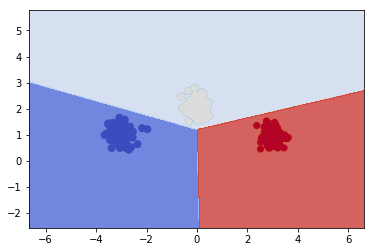

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

# Create the  training data
np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

#print(y)
#Here we test the OneVsAllClassifier
from sklearn import svm
svm_estimator = svm.LinearSVC()
clf_onevsall = OneVsAllClassifier(svm_estimator, n_classes=3)
clf_onevsall.fit(X,y)

for i in range(3) :
    print("Coeffs %d"%i)
    print(clf_onevsall.estimators[i].coef_) #Will fail if you haven't implemented fit yet

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, clf_onevsall.predict(X))

Coeffs 0
[[-1.05854193 -0.90296009]]
Coeffs 1
[[0.29542345 0.50894293]]
Coeffs 2
[[ 0.89050156 -0.82570517]]


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   9,  91]], dtype=int64)

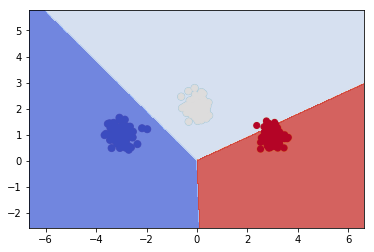

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

# Create the  training data
np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

#print(y)
#Here we test the OneVsAllClassifier
from sklearn import svm
svm_estimator = svm.LinearSVC(loss='hinge', fit_intercept=False, C=200)
clf_onevsall = OneVsAllClassifier(svm_estimator, n_classes=3)
clf_onevsall.fit(X,y)

for i in range(3) :
    print("Coeffs %d"%i)
    print(clf_onevsall.estimators[i].coef_) #Will fail if you haven't implemented fit yet

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, clf_onevsall.predict(X))

Using no intercept, 'hinge loss' and a large C parameters, the accuracy will go down compared with calculating intercept, 'square loss' and a default C=1.

#### 4.2 Multiclass SVM

In [5]:
def zeroOne(y,a) :
    '''
    Computes the zero-one loss.
    @param y: output class
    @param a: predicted class
    @return 1 if different, 0 if same
    '''
    return int(y != a)

def featureMap(X,y,num_classes) :
    '''
    Computes the class-sensitive features.
    @param X: array-like, shape = [n_samples,n_inFeatures] or [n_inFeatures,], input features for input data
    @param y: a target class (in range 0,..,num_classes-1)
    @return array-like, shape = [n_samples,n_outFeatures], the class sensitive features for class y
    '''
    #The following line handles X being a 1d-array or a 2d-array
    num_samples, num_inFeatures = (1,X.shape[0]) if len(X.shape) == 1 else (X.shape[0],X.shape[1])
    if len(X.shape) == 1:
        X=X[np.newaxis,:]
    y_n=np.array([y]) if type(y)!=np.ndarray else y
    n_outFeatures=num_classes*num_inFeatures
    X_out=np.zeros([num_samples,n_outFeatures])
    for i in range(num_samples):
        X_out[i][y_n[i]*num_inFeatures:(y_n[i]+1)*num_inFeatures]=X[i]
    return X_out

def sgd(X, y, num_outFeatures, subgd, eta = 0.1, T = 10000):
    '''
    Runs subgradient descent, and outputs resulting parameter vector.
    @param X: array-like, shape = [n_samples,n_features], input training data 
    @param y: array-like, shape = [n_samples,], class labels
    @param num_outFeatures: number of class-sensitive features
    @param subgd: function taking x,y and giving subgradient of objective
    @param eta: learning rate for SGD
    @param T: maximum number of iterations
    @return: vector of weights
    '''
    num_samples = X.shape[0]
    #your code goes here and replaces following return statement
    w=np.zeros([num_outFeatures])
    for t in range(T):
        the_ind=np.random.randint(num_samples)
        #print(X,'\n',y)
        local_sg=subgd(X[the_ind],y[the_ind],w)
        w=w-eta*local_sg
    return(w[0])

class MulticlassSVM(BaseEstimator, ClassifierMixin):
    '''
    Implements a Multiclass SVM estimator.
    '''
    def __init__(self, num_outFeatures, lam=1.0, num_classes=3, Delta=zeroOne, Psi=featureMap):       
        '''
        Creates a MulticlassSVM estimator.
        @param num_outFeatures: number of class-sensitive features produced by Psi
        @param lam: l2 regularization parameter
        @param num_classes: number of classes (assumed numbered 0,..,num_classes-1)
        @param Delta: class-sensitive loss function taking two arguments (i.e., target margin)
        @param Psi: class-sensitive feature map taking two arguments
        '''
        self.num_outFeatures = num_outFeatures
        self.lam = lam
        self.num_classes = num_classes
        self.Delta = Delta
        self.Psi = lambda X,y : Psi(X,y,num_classes)
        self.fitted = False
    
    def subgradient(self,x,y,w):
        '''
        Computes the subgradient at a given data point x,y
        @param x: sample input
        @param y: sample class
        @param w: parameter vector
        @return returns subgradient vector at given x,y,w
        '''
        #Your code goes here and replaces the following return statement
        #Find yhat:
        yhat=0
        local_max=self.Delta(y,yhat)+np.dot(w,(self.Psi(x,yhat)-self.Psi(x,y))[0])
        for ys in np.arange(1,self.num_classes,1):
            tp_max=self.Delta(y,ys)+np.dot(w,(self.Psi(x,ys)-self.Psi(x,y))[0])
            if tp_max>local_max:
                local_max=tp_max
                yhat=ys
                
        local_sgd=2*self.lam*w+self.Psi(x,yhat)-self.Psi(x,y)
        return(local_sgd)
        
    def fit(self,X,y,eta=0.0002,T=10000):
        '''
        Fits multiclass SVM
        @param X: array-like, shape = [num_samples,num_inFeatures], input data
        @param y: array-like, shape = [num_samples,], input classes
        @param eta: learning rate for SGD
        @param T: maximum number of iterations
        @return returns self
        '''
        self.coef_ = sgd(X,y,self.num_outFeatures,self.subgradient,eta,T)
        self.fitted = True
        return self
    
    def decision_function(self, X):
        '''
        Returns the score on each input for each class. Assumes
        that fit has been called.
        @param X : array-like, shape = [n_samples, n_inFeatures]
        @return array-like, shape = [n_samples, n_classes] giving scores for each sample,class pairing
        '''
        if not self.fitted:
            raise RuntimeError("You must train classifer before predicting data.")
        #Your code goes here and replaces following return statement
        if len(X.shape)==1:
            #print('oh fuck!')
            score=np.zeros([self.num_classes])
            for i in range(self.num_classes):
                X_out=self.Psi(X,i)
                score[i]=np.dot(self.coef_,X_out)
            score=score[np.newaxis,:]
            return(score)
        
        else:
            num_samples=X.shape[0]
            score=np.zeros([num_samples,self.num_classes])
            for i in range(num_samples):
                for j in range(self.num_classes):
                    X_out=self.Psi(X[i],j)
                    score[i][j]=np.dot(self.coef_,X_out.T)
            return(score)
            
    def predict(self, X):
        '''
        Predict the class with the highest score.
        @param X: array-like, shape = [n_samples, n_inFeatures], input data to predict
        @return array-like, shape = [n_samples,], class labels predicted for each data point
        '''
        #Your code goes here and replaces following return statement
        score_mt=self.decision_function(X)
        score=np.zeros([score_mt.shape[0]])
        for i in range(score_mt.shape[0]):
            #print(np.where(score[i]==max(score[i])))
            score[i]=np.where(score_mt[i]==max(score_mt[i]))[0][0]
        return(score)

w:
[-0.344787   -0.03649096 -0.00341122  0.06953766  0.34819822 -0.0330467 ]


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]], dtype=int64)

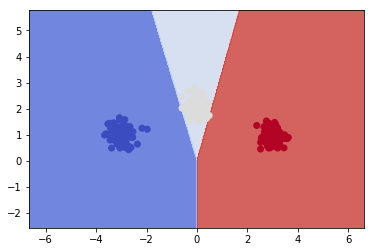

In [6]:
#the following code tests the MulticlassSVM and sgd
#will fail if MulticlassSVM is not implemented yet
est = MulticlassSVM(6,lam=1)
est.fit(X,y)
print("w:")
print(est.coef_)
Z = est.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, est.predict(X))

### 6 Decision Tree Implementation

#### 6.1

In [123]:
class Decision_Tree(BaseEstimator):
     
    def __init__(self, split_loss_function, leaf_value_estimator,
                 depth=0, min_sample=5, max_depth=10):

        self.split_loss_function = split_loss_function
        self.leaf_value_estimator = leaf_value_estimator
        self.depth = depth
        self.min_sample = min_sample
        self.max_depth = max_depth

    def fit(self, X, y=None):

        num_samp=X.shape[0]
        num_feat=X.shape[1]
        
        if np.var(y)==0.0:
            self.is_leaf=True
            self.value=np.mean(y)
            return(self)
        else:
            # Calculate entropy/IM/etc, I have to change input of entropy func this time
            entropy=np.zeros(num_feat)
            for i in range(num_feat):
                entropy[i]=self.split_loss_function(X[:,i])
                
            self.split_id=np.where(entropy==max(entropy))[0][0]
            self.split_value=np.mean(X[:,self.split_id])
            
            left_X=[]
            left_y=[]
            right_X=[]
            right_y=[]
            for i in range(num_samp):
                if X[i,self.split_id]<self.split_value:
                    left_X.append(X[i])
                    left_y.append(y[i])
                else:
                    right_X.append(X[i])
                    right_y.append(y[i])
                    
            self.left=Decision_Tree(self.loss_function_dict[loss_function],
                                most_common_label,
                                0, min_sample, max_depth)
            self.right=Decision_Tree(self.loss_function_dict[loss_function],
                                most_common_label,
                                0, min_sample, max_depth)
            
            self.left.fit(left_X,left_y)
            self.right.fit(right_X,right_y)

        return self

    def predict_instance(self, instance):

        if self.is_leaf:
            return self.value
        if instance[self.split_id] <= self.split_value:
            return self.left.predict_instance(instance)
        else:
            return self.right.predict_instance(instance)

#### 6.2

In [122]:
def compute_entropy(label_array):
    '''
    Calulate the entropy of given label list
    
    :param label_array: a numpy array of labels shape = (n, 1)
    :return entropy: entropy value
    '''
    # Your code goes here
    num_samp=label_array.shape[0]
    dic_val={}
    entropy=0
    for val in label_array:
        if val not in dic_val:
            dic_val[val]=0
        dic_val[val]+=1
        
    for val in dic_val:
        pval=float(count[val])/num_samp
        entropy-=pval*np.log(pval,2)
    return entropy

### 7 Gradient Boosting Machines
#### 7.1

Proof:\\
Consider the expression of $g_m$ and $h_m$ and loss function:\\
$$\ell(y_i,f(x_i))=\frac{1}{2}(y_{i}-f(x_i))$$
we have:\\
$$g_{m,i}=(\frac{\partial (1/2)(y_{i}-f_{m-1}(x_i))^2}{\partial f_{m-1}(x_i)})=(f_{m-1}(x_i)-y_{i})$$
So we can get expression for $h_m$:\\
$$h_{m}=argmin\sum_i^n(-g_{m,i}-h(x_i))^2=argmin\sum_i^n(y_{i}-f_{m-1}(x_i)-h(x_i))^2$$

#### 7.2
Consider the expression of loss:\\
$$\ell(y_i ,f(x_i))=ln(1+e^{-y_i f(x_i)})$$
we have:\\
$$g_{m,i}=(\frac{\partial ln(1+e^{-y_i f(x_i)})}{\partial f_{m-1}(x_i)})=\frac{-y_{i}e^{-y_i f_{m-1}(x_i)}}{1+e^{-y_i f_{m-1}(x_i)}}$$
So $h_m$ should be:\\
$$h_{m}=argmin\sum_i^n(-g_{m,i}-h(x_i))^2=argmin\sum_i^n(\frac{y_{i}e^{-y_i f_{m-1}(x_i)}}{1+e^{-y_i f_{m-1}(x_i)}}-h(x_i))^2$$

### 8 Gradient Boosting Implementation

In [7]:
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz

from IPython.display import Image

%matplotlib inline

In [8]:
data_train = np.loadtxt('svm-train.txt')
data_test = np.loadtxt('svm-test.txt')
x_train, y_train = data_train[:, 0: 2], data_train[:, 2].reshape(-1, 1)
x_test, y_test = data_test[:, 0: 2], data_test[:, 2].reshape(-1, 1)
# Change target to 0-1 label
y_train_label = np.array(list(map(lambda x: 1 if x > 0 else 0, y_train))).reshape(-1, 1)

In [9]:
data_krr_train = np.loadtxt('krr-train.txt')
data_krr_test = np.loadtxt('krr-test.txt')
x_krr_train, y_krr_train = data_krr_train[:,0].reshape(-1,1),data_krr_train[:,1].reshape(-1,1)
x_krr_test, y_krr_test = data_krr_test[:,0].reshape(-1,1),data_krr_test[:,1].reshape(-1,1)

In [108]:
#Pseudo-residual function.
#Here you can assume that we are using L2 loss

def pseudo_residual_L2(train_target, train_predict):
    '''
    Compute the pseudo-residual based on current predicted value. 
    '''
    
    return train_target - train_predict

In [115]:
class gradient_boosting():
    '''
    Gradient Boosting regressor class
    :method fit: fitting model
    '''
    def __init__(self, n_estimator, pseudo_residual_func, learning_rate=0.1, min_sample=5, max_depth=3):
        '''
        Initialize gradient boosting class
        
        :param n_estimator: number of estimators (i.e. number of rounds of gradient boosting)
        :pseudo_residual_func: function used for computing pseudo-residual
        :param learning_rate: step size of gradient descent
        '''
        self.n_estimator = n_estimator
        self.pseudo_residual_func = pseudo_residual_func
        self.learning_rate = learning_rate
        self.min_sample = min_sample
        self.max_depth = max_depth
        #print(self.learning_rate)
        
    def now_esti(self,in_data,backward=0):
        predicted_y=np.zeros([len(in_data)])
        #print('shape: ',in_data.shape)
        for i in range(len(self.ori_estimator)-backward):
            #print(self.ori_estimator[i].predict(in_data).shape,predicted_y.shape)
            predicted_y+=self.learning_rate*self.ori_estimator[i].predict(in_data)
        
        predicted_y=predicted_y[:,np.newaxis]
        #print('py_shape:',predicted_y.shape)
        return(predicted_y)

    
    def fit(self, train_data, train_target):
        '''
        Fit gradient boosting model
        '''
        # Your code goes here 
        ### Use a list to storage estimators 1 to n_estimators, 
        ### then add the predicted results together with the weight of vm.
        #print('tt_shape:',train_target.shape)
        self.ori_estimator=[]
        #print('fit: ',self.n_estimator)
        for i in range(self.n_estimator):
            #self.ori_estimator.append(DecisionTreeRegressor())
            self.ori_estimator.append(DecisionTreeRegressor(min_samples_split=self.min_sample,max_depth=self.max_depth))
            self.ori_estimator[i].fit(train_data,self.pseudo_residual_func(train_target,self.now_esti(train_data,1)))

        return(self)
        
    def predict(self, test_data):
        '''
        Predict value
        '''
        # Your code goes here
        predicted_y=self.now_esti(test_data,0)
        return(predicted_y)
        

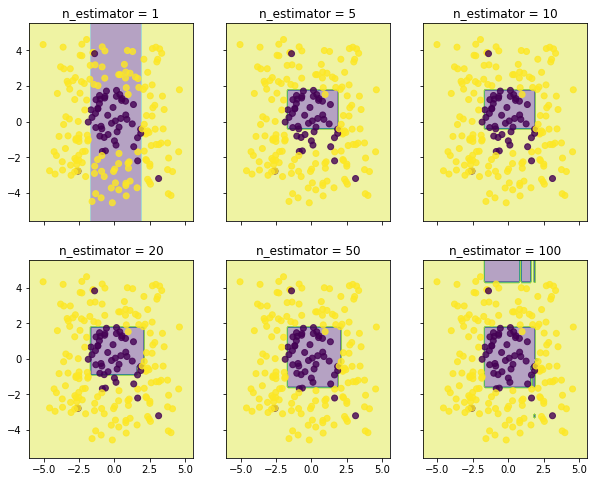

In [116]:
# Plotting decision regions
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(10, 8))

for idx, i, tt in zip(product([0, 1], [0, 1, 2]),
                       [1, 5, 10, 20, 50, 100], 
                       ['n_estimator = {}'.format(n) for n in [1, 5, 10, 20, 50, 100]]):
    
    gbt = gradient_boosting(n_estimator=i, pseudo_residual_func=pseudo_residual_L2, max_depth=2)  
    gbt.fit(x_train, y_train)
                   
    Z = np.sign(gbt.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    #print('shape Z:',Z.shape)
    #print(Z)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(x_train[:, 0], x_train[:, 1], c=np.squeeze(y_train_label), alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

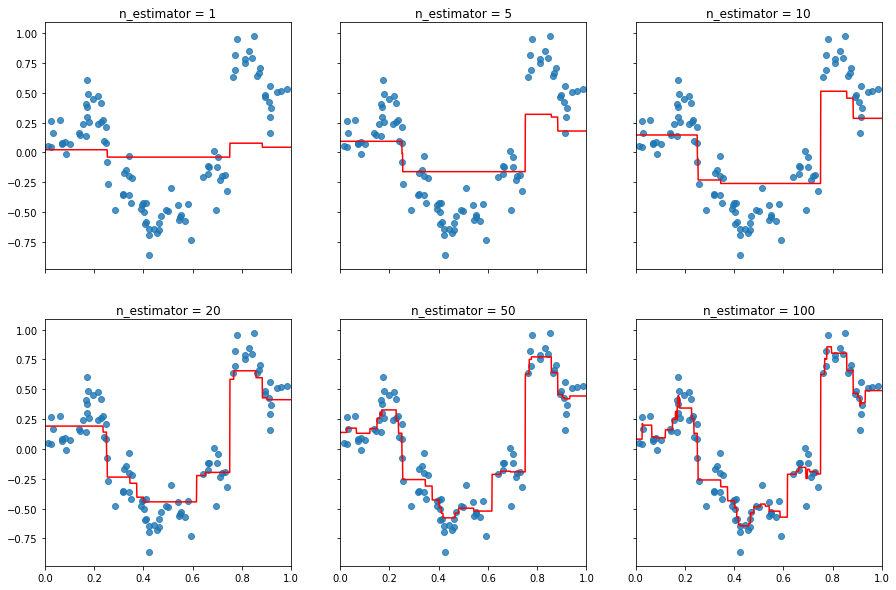

In [117]:
plot_size = 0.001
x_range = np.arange(0., 1., plot_size).reshape(-1, 1)

f2, axarr2 = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15, 10))

for idx, i, tt in zip(product([0, 1], [0, 1, 2]),
                       [1, 5, 10, 20, 50, 100], 
                       ['n_estimator = {}'.format(n) for n in [1, 5, 10, 20, 50, 100]]):
    
    gbm_1d = gradient_boosting(n_estimator=i, pseudo_residual_func=pseudo_residual_L2, max_depth=2)  
    gbm_1d.fit(x_krr_train, y_krr_train)
    
    y_range_predict = gbm_1d.predict(x_range)

    axarr2[idx[0], idx[1]].plot(x_range, y_range_predict, color='r')
    axarr2[idx[0], idx[1]].scatter(x_krr_train, y_krr_train, alpha=0.8)
    axarr2[idx[0], idx[1]].set_title(tt)
    axarr2[idx[0], idx[1]].set_xlim(0, 1)

#### 8.2

In [96]:
def pseudo_residual_Shin_Log(train_target, train_predict):
    num_samp=len(train_target)
    out_res=np.zeros(num_samp)
    for i in range(num_samp):
        out_res[i]=train_target[i]*np.exp(-(train_target[i]*train_predict[i]))/(1+np.exp(-(train_target[i]*train_predict[i])))    
    
    return out_res

In [91]:
def pseudo_residual_hinge(train_target, train_predict):
    
    num_samp=len(train_target)
    out_res=np.zeros(num_samp)
    for i in range(num_samp):
        if max(0,1-train_target[i]*train_predict[i])==0:
            out_res[i]=0
        else:
            out_res[i]=train_target[i]
    
    return out_res

With Hinge:

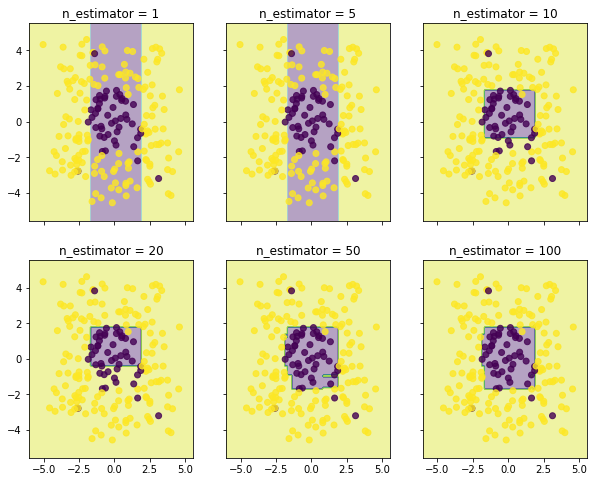

In [118]:
# Plotting decision regions
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(10, 8))

for idx, i, tt in zip(product([0, 1], [0, 1, 2]),
                       [1, 5, 10, 20, 50, 100], 
                       ['n_estimator = {}'.format(n) for n in [1, 5, 10, 20, 50, 100]]):
    
    gbt = gradient_boosting(n_estimator=i, pseudo_residual_func=pseudo_residual_hinge, max_depth=2)  
    gbt.fit(x_train, y_train)
                   
    Z = np.sign(gbt.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    #print('shape Z:',Z.shape)
    #print(Z)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(x_train[:, 0], x_train[:, 1], c=np.squeeze(y_train_label), alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

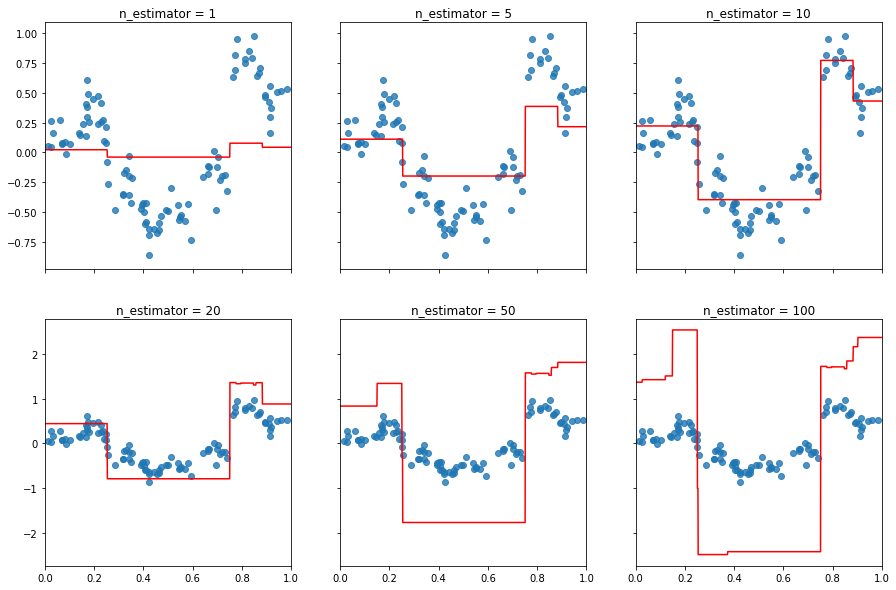

In [119]:
plot_size = 0.001
x_range = np.arange(0., 1., plot_size).reshape(-1, 1)

f2, axarr2 = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15, 10))

for idx, i, tt in zip(product([0, 1], [0, 1, 2]),
                       [1, 5, 10, 20, 50, 100], 
                       ['n_estimator = {}'.format(n) for n in [1, 5, 10, 20, 50, 100]]):
    
    gbm_1d = gradient_boosting(n_estimator=i, pseudo_residual_func=pseudo_residual_hinge, max_depth=2)  
    gbm_1d.fit(x_krr_train, y_krr_train)
    
    y_range_predict = gbm_1d.predict(x_range)

    axarr2[idx[0], idx[1]].plot(x_range, y_range_predict, color='r')
    axarr2[idx[0], idx[1]].scatter(x_krr_train, y_krr_train, alpha=0.8)
    axarr2[idx[0], idx[1]].set_title(tt)
    axarr2[idx[0], idx[1]].set_xlim(0, 1)

With Log:

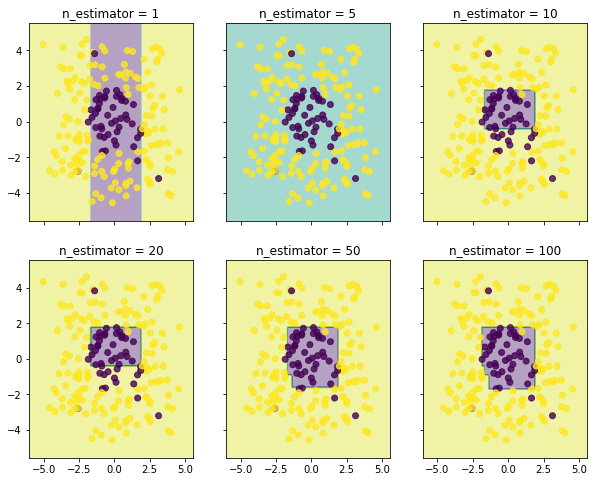

In [120]:
# Plotting decision regions
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(10, 8))

for idx, i, tt in zip(product([0, 1], [0, 1, 2]),
                       [1, 5, 10, 20, 50, 100], 
                       ['n_estimator = {}'.format(n) for n in [1, 5, 10, 20, 50, 100]]):
    
    gbt = gradient_boosting(n_estimator=i, pseudo_residual_func=pseudo_residual_Shin_Log, max_depth=2)  
    gbt.fit(x_train, y_train)
                   
    Z = np.sign(gbt.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    #print('shape Z:',Z.shape)
    #print(Z)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(x_train[:, 0], x_train[:, 1], c=np.squeeze(y_train_label), alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

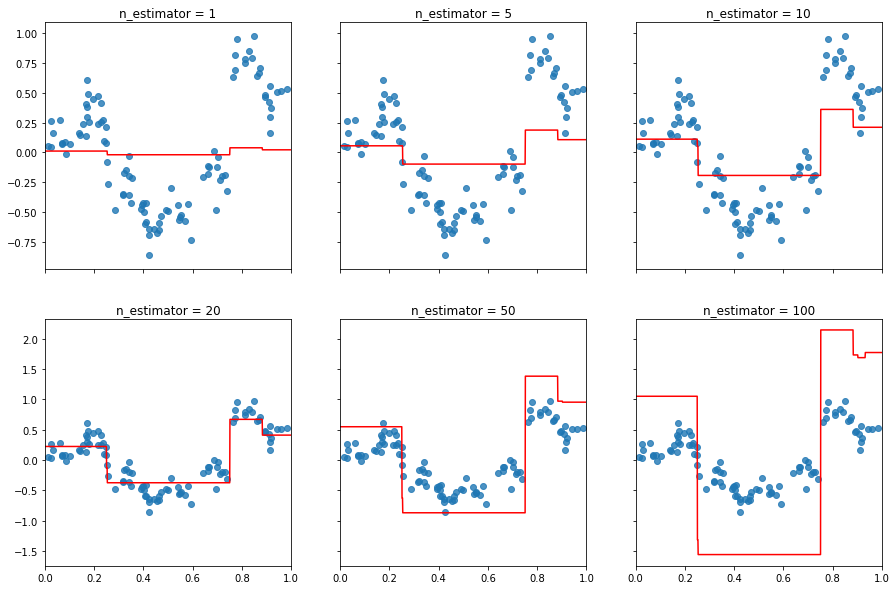

In [121]:
plot_size = 0.001
x_range = np.arange(0., 1., plot_size).reshape(-1, 1)

f2, axarr2 = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15, 10))

for idx, i, tt in zip(product([0, 1], [0, 1, 2]),
                       [1, 5, 10, 20, 50, 100], 
                       ['n_estimator = {}'.format(n) for n in [1, 5, 10, 20, 50, 100]]):
    
    gbm_1d = gradient_boosting(n_estimator=i, pseudo_residual_func=pseudo_residual_Shin_Log, max_depth=2)  
    gbm_1d.fit(x_krr_train, y_krr_train)
    
    y_range_predict = gbm_1d.predict(x_range)

    axarr2[idx[0], idx[1]].plot(x_range, y_range_predict, color='r')
    axarr2[idx[0], idx[1]].scatter(x_krr_train, y_krr_train, alpha=0.8)
    axarr2[idx[0], idx[1]].set_title(tt)
    axarr2[idx[0], idx[1]].set_xlim(0, 1)

Conclusion: Both hinge loss and logistic loss works for the classification problem, while either could perform well for the regression problem, since predicted result will be diverged easily. Although I tried parameter adjustment, overfit just happens more easily, and after that the result diverged.